In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('results/ngrok.csv')
df

,timestamp,totalMemory,totalCpuPercentage,processCount
0,2024-09-12T19:50:16.987Z,31436800,0.00,1
1,2024-09-12T19:50:17.994Z,31436800,0.00,1
2,2024-09-12T19:50:19.002Z,31436800,0.00,1
3,2024-09-12T19:50:20.008Z,31436800,1.98,1
4,2024-09-12T19:50:21.018Z,31436800,0.00,1
...,...,...,...,...
87,2024-09-12T19:51:44.723Z,298438656,1.00,1
88,2024-09-12T19:51:45.732Z,298438656,0.00,1
89,2024-09-12T19:51:46.738Z,298438656,0.99,1
90,2024-09-12T19:51:47.747Z,298438656,0.00,1


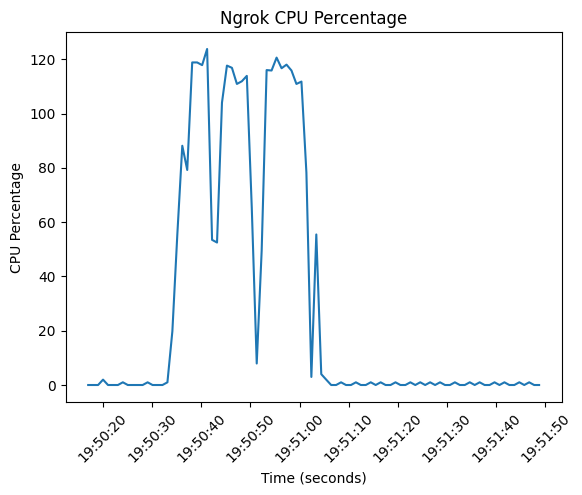

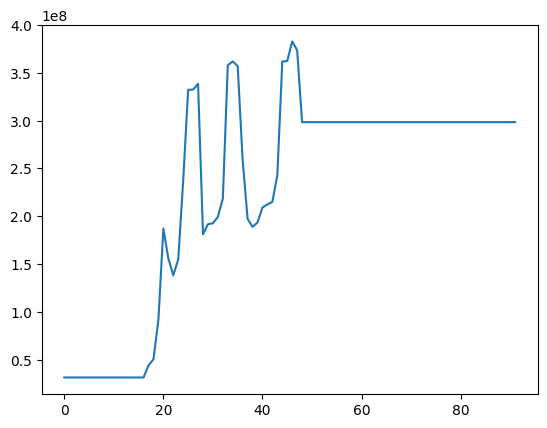

In [13]:
# plot cpu percentage by timestamp with a reasonable x-axis

plt.plot(pd.to_datetime(df['timestamp']), df['totalCpuPercentage'])
plt.title('Ngrok CPU Percentage')
plt.xlabel('Time (seconds)')
plt.xticks(rotation=45)

plt.ylabel('CPU Percentage')
plt.show()

# plot memory percentage
plt.plot(df['totalMemory'])
plt.show()

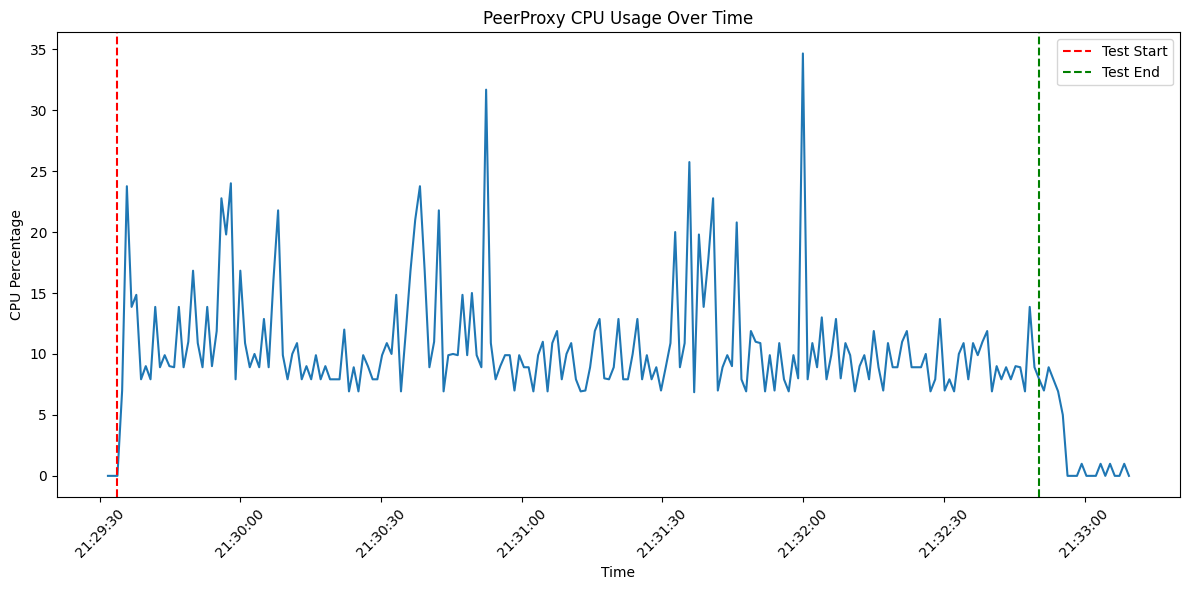

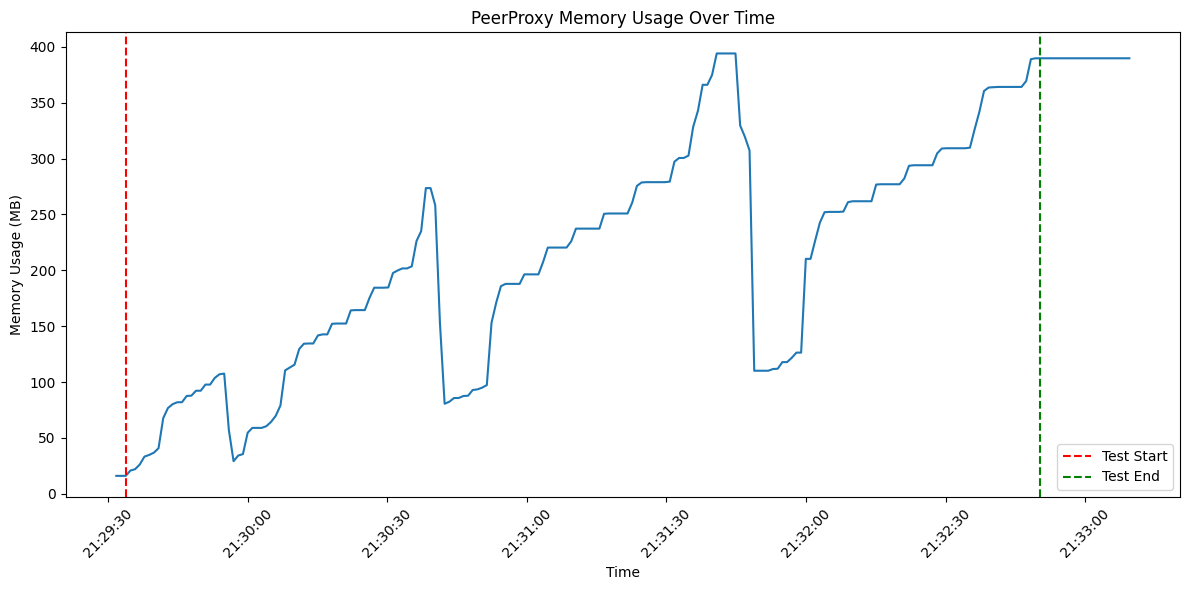

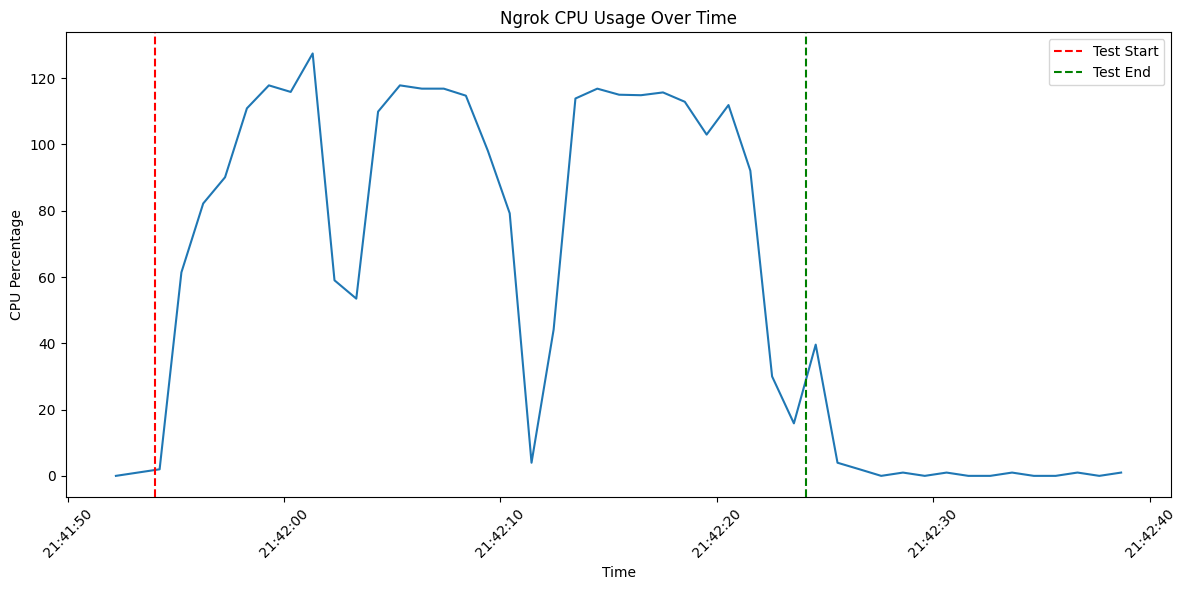

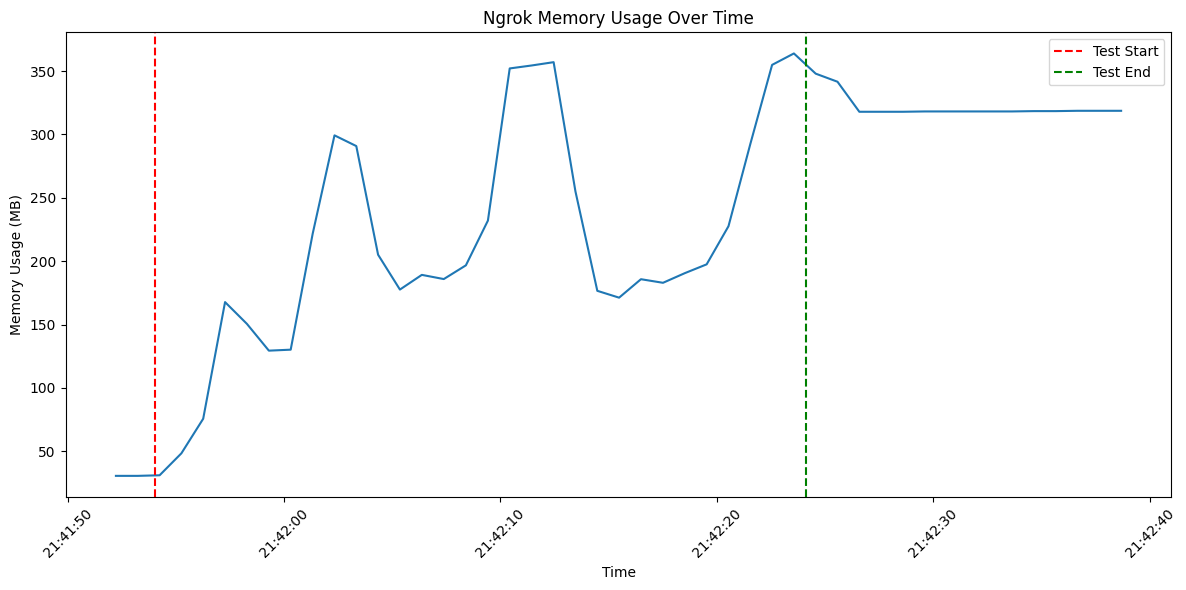

In [28]:
def plot_performance(csv_file, test_name, test_start, test_end):
    testStarted = pd.to_datetime(test_start)
    testEnded = pd.to_datetime(test_end)

    df = pd.read_csv(csv_file)
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Plot CPU percentage
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['totalCpuPercentage'])
    plt.title(f'{test_name} CPU Usage Over Time')
    plt.xlabel('Time')
    plt.ylabel('CPU Percentage')
    plt.xticks(rotation=45)

    # Add annotations
    plt.axvline(x=testStarted, color='r', linestyle='--', label='Test Start')
    plt.axvline(x=testEnded, color='g', linestyle='--', label='Test End')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot memory usage
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['totalMemory'] / 1024 / 1024)  # Convert to MB
    plt.title(f'{test_name} Memory Usage Over Time')
    plt.xlabel('Time')
    plt.ylabel('Memory Usage (MB)')
    plt.xticks(rotation=45)

    # Add annotations
    plt.axvline(x=testStarted, color='r', linestyle='--', label='Test Start')
    plt.axvline(x=testEnded, color='g', linestyle='--', label='Test End')
    plt.legend()

    plt.tight_layout()
    plt.show()


peerproxyStart = "2024-09-12T21:29:33.758Z"
peerproxyEnd = "2024-09-12T21:32:50.360Z"

ngrokStart = "2024-09-12T21:41:54.054Z"
ngrokEnd = "2024-09-12T21:42:24.097Z"

plot_performance('results/peerproxy2.txt', 'PeerProxy', peerproxyStart, peerproxyEnd)
plot_performance('results/ngrok2.txt', 'Ngrok', ngrokStart, ngrokEnd)

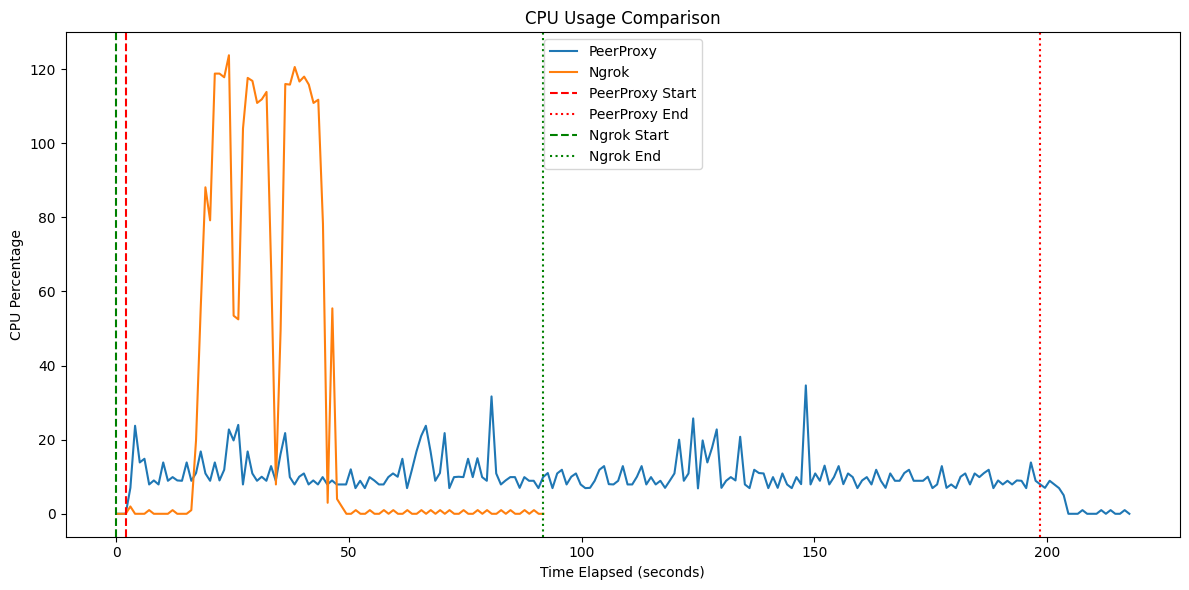

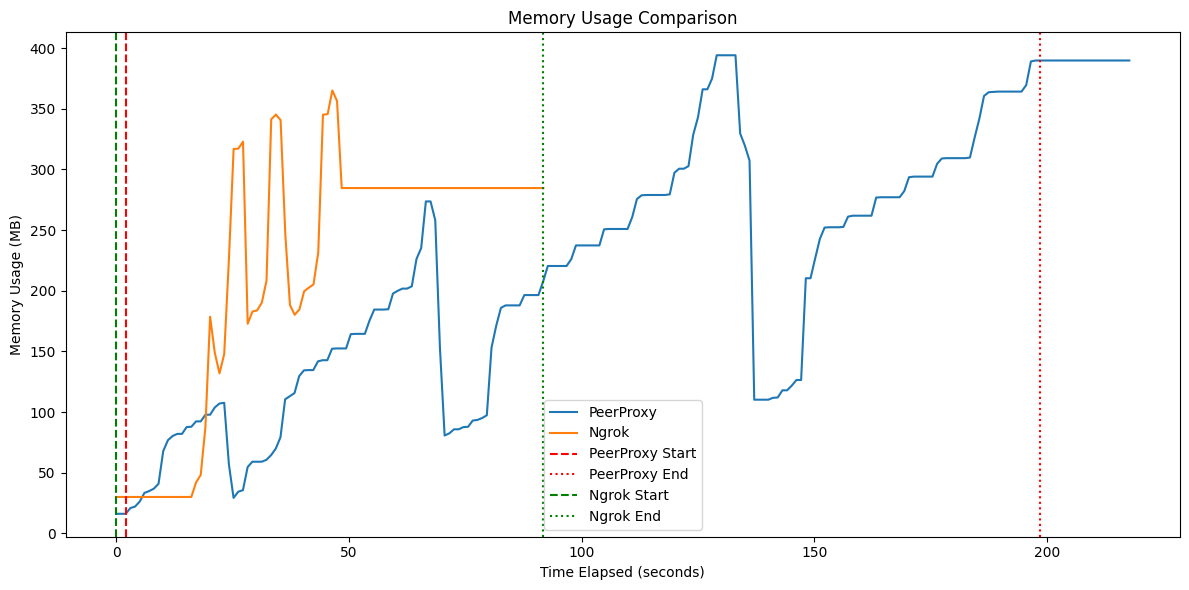

In [33]:
def compare_performance(csv_file1, test_name1, start1, end1, csv_file2, test_name2, start2, end2):
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    df2['timestamp'] = pd.to_datetime(df2['timestamp'])
    
    start1 = pd.to_datetime(start1)
    end1 = pd.to_datetime(end1)
    start2 = pd.to_datetime(start2)
    end2 = pd.to_datetime(end2)
    
    # Normalize timestamps
    df1['time_elapsed'] = (df1['timestamp'] - df1['timestamp'].min()).dt.total_seconds()
    df2['time_elapsed'] = (df2['timestamp'] - df2['timestamp'].min()).dt.total_seconds()
    
    # Plot CPU usage comparison
    plt.figure(figsize=(12, 6))
    plt.plot(df1['time_elapsed'], df1['totalCpuPercentage'], label=test_name1)
    plt.plot(df2['time_elapsed'], df2['totalCpuPercentage'], label=test_name2)
    plt.title('CPU Usage Comparison')
    plt.xlabel('Time Elapsed (seconds)')
    plt.ylabel('CPU Percentage')
    
    # Add start and end markers for test1
    start1_elapsed = (start1 - df1['timestamp'].min()).total_seconds()
    end1_elapsed = (end1 - df1['timestamp'].min()).total_seconds()
    plt.axvline(x=start1_elapsed, color='r', linestyle='--', label=f'{test_name1} Start')
    plt.axvline(x=end1_elapsed, color='r', linestyle=':', label=f'{test_name1} End')
    
    # Add start and end markers for test2
    start2_elapsed = (start2 - df2['timestamp'].min()).total_seconds()
    end2_elapsed = (end2 - df2['timestamp'].min()).total_seconds()
    plt.axvline(x=start2_elapsed, color='g', linestyle='--', label=f'{test_name2} Start')
    plt.axvline(x=end2_elapsed, color='g', linestyle=':', label=f'{test_name2} End')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot Memory usage comparison
    plt.figure(figsize=(12, 6))
    plt.plot(df1['time_elapsed'], df1['totalMemory'] / 1024 / 1024, label=test_name1)
    plt.plot(df2['time_elapsed'], df2['totalMemory'] / 1024 / 1024, label=test_name2)
    plt.title('Memory Usage Comparison')
    plt.xlabel('Time Elapsed (seconds)')
    plt.ylabel('Memory Usage (MB)')
    
    # Add start and end markers for test1
    plt.axvline(x=start1_elapsed, color='r', linestyle='--', label=f'{test_name1} Start')
    plt.axvline(x=end1_elapsed, color='r', linestyle=':', label=f'{test_name1} End')
    
    # Add start and end markers for test2
    plt.axvline(x=start2_elapsed, color='g', linestyle='--', label=f'{test_name2} Start')
    plt.axvline(x=end2_elapsed, color='g', linestyle=':', label=f'{test_name2} End')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
compare_performance(
    'results/peerproxy2.txt', 'PeerProxy', 
    "2024-09-12T21:29:33.758Z", "2024-09-12T21:32:50.360Z",
    'results/ngrok.csv', 'Ngrok', 
    "2024-09-12T19:50:16.987Z", "2024-09-12T19:51:48.756Z"
)